In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

def ncoeff(t, delta,omega_R):

    return omega_R*np.exp(-1j * delta * t)

def pcoeff(t, delta,omega_R):
    return omega_R*np.exp(1j * delta * t)

delta = np.pi*1e6

omega_R = np.pi*1e6



a = tensor(qeye(2),qeye(2),destroy(2))
args={'delta': delta,'omega_R':omega_R}

# hamiltonian
H_pa =  a.dag()
H_na =  a

H = [[tensor(qeye(2),sigmaz(),qeye(2)) * a, ncoeff],
     [tensor(sigmaz(),qeye(2),qeye(2)) * a.dag(), pcoeff],
     [tensor(qeye(2),sigmaz(),qeye(2)) * a.dag(), pcoeff],
     [tensor(sigmaz(),qeye(2),qeye(2)) * a, ncoeff]]

args={'delta': delta,'omega_R':omega_R}
# initial state
psi0 = tensor(bell_state(),basis(2,0))
tlist = np.linspace(0,2e-6,1000)
e_ops = [tensor(sigmaz(), sigmaz(),qeye(2))]
# 定义目标Bell态投影算符（扩展到三子系统）

bell_target =tensor(bell_state(),basis(2,0))
bell_projector = bell_target * bell_target.dag()

# 观测算符列表：Bell态保真度 + 各子系统期望值
e_ops = {

}
result = mesolve(H, psi0, tlist, c_ops=[], e_ops=e_ops, args=args)
plt.figure(figsize=(10, 6))



final_state = result.states[-1]  # Get the last state from the result
fidelity_value = fidelity(final_state, bell_target)  # Calculate fidelity
print("Fidelity of the final state with the target Bell state:", fidelity_value)



Fidelity of the final state with the target Bell state: 0.9306470111292757


<Figure size 1000x600 with 0 Axes>

In [2]:
fidelity_value

0.9306470111292757

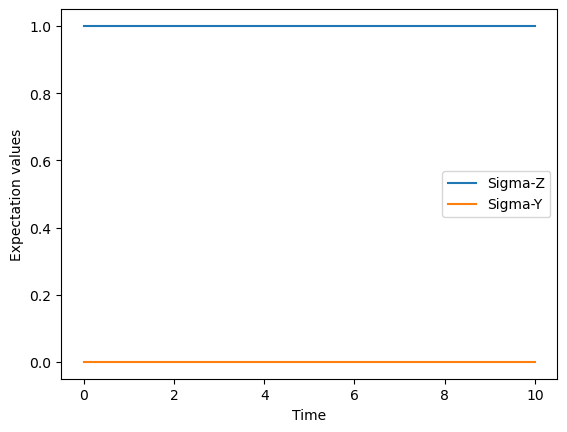

In [356]:
bell_target = basis(8,0),
bell_projector =  basis(8,0) * basis(8,0).dag()
bell_projector


Quantum object: dims=[[8], [8]], shape=(8, 8), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]